# Fórmula 1

## Introdução / Introduction


A Fórmula 1 hoje em dia é uma das grandes paixões dos brasileiros nos esportes. <br>
Essa paixão em massa pode ter iniciado com Emerson Fittipaldi lá nos anos 70, quando ele alcançou sua primeira vitória e chegou ao seu primeiro título poucos anos depois, em 1972. E essas histórias podem ser acompanhadas em séries e documentários já publicados sobre as conquistas do brasileiros na F1. Mas falando em dados e indo além dos grandes nomes como: Fittipaldi, Senna e Piquet, quando surgiu **o primeiro brasileiro** na F1? Qual seu desempenho? **Quantos passaram** pela categória? Como é o **histórico geral** do Brasil nessa categória? Várias perguntas não são usualmente respondidas pelas grandes mídias vão ser respondidas aqui.
<br>

--------------

*Formula 1 nowadays is one of the great passions of Brazilians in sports. <br>
This mass passion may have started with Emerson Fittipaldi back in the 70s, when he achieved his first victory and reached his first title a few years later, in 1972. And these stories can be followed in series and documentaries already published about the conquests of the Brazilians in F1. But speaking about data and going beyond the big names like: Fittipaldi, Senna and Piquet, when did **the first Brazilian** appear in F1? What's your performance? **How many passed** the category? How is the **general history** of Brazil in this category? Several questions not usually answered by mainstream media will be answered here.

Como ponto de partida queremos saber:<br>
* Quem foi o primeiro piloto e qual seu desempenho?<br>
* Como foi o Brasil na F1 até alcançar as primeiras vitórias?<br>
* Como é o histórico do Brasil ao longo dos anos?<br>
    
Se estamos lidando com competição<br>
* Qual foi o país mais vencedor na F1?<br>
* Desempenho do País x Desempenho do Brasil<br>
* Quais perguntas podem surgir no meio do caminho?<br>
------------------------
*As a starting point we want to know:* <br>
* *Who was the first pilot and what was his performance?*<br>
* *How was Brazil in F1 until reaching the first victories?*<br>
* *How is the history of Brazil over the years?*<br>

*If we are dealing with competition*<br>
* *What was the most winning country in F1?*<br>
* *ountry Performance x Brazil Performance*<br>
* *What questions may arise along the way?*<br>

## Importando os dados

Os dados estão no dataset "Formula 1 World Championship (1950 - 2022)" disponíveis no site Kaggle.com. <br>
    https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020
    
---------------

*The dataset is "Formula 1 World Championship (1950 - 2022)" avaliable on Kaggle.com.<br>
    https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020*

In [1]:
#Bibliotecas/ Library
import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
import requests
import urllib.request

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime as dt

In [2]:
# importando datasets/ import datasets
circuits = pd.read_csv('data/circuits.csv')
constructor_results = pd.read_csv('data/constructor_results.csv')
constructor_standings = pd.read_csv('data/constructor_standings.csv')
constructors = pd.read_csv('data/constructors.csv')
driver_standings = pd.read_csv('data/driver_standings.csv')
drivers = pd.read_csv('data/drivers.csv') #contém datatime ('dob' - day of birth)
lap_times = pd.read_csv('data/lap_times.csv')#contem datatime ('time' - lap time)
pit_stops = pd.read_csv('data/pit_stops.csv')#contem datatime ()
qualifying = pd.read_csv('data/qualifying.csv')#contem datatime ('q1', 'q2', 'q3', qualifying times)
races = pd.read_csv('data/races.csv') #contem datatime 
results = pd.read_csv('data/results.csv') #contem datatime 
seasons = pd.read_csv('data/seasons.csv') #contem datatime 
sprint_results = pd.read_csv('data/sprint_results.csv') #contem datatime 
status = pd.read_csv('data/status.csv') 

A verificar a composição dos datasets importados\ Checking the composition of imported datasets


In [3]:
display('circuits', circuits.head(3), circuits.shape)
display('constructor_results', constructor_results.head(3),constructor_results.shape)
display('constructor_standings', constructor_standings.head(3), constructor_standings.shape)
display('constructors', constructors.head(3), constructors.shape)
display('driver_standings', driver_standings.head(3), driver_standings.shape)
display('drivers', drivers.head(3), drivers.shape)
display('lap_times', lap_times.head(3), lap_times.shape)
display('pit_stops', pit_stops.head(3), pit_stops.shape)
display('qualifying', qualifying.head(3),qualifying.shape)
display('races', races.head(3), races.shape)
display('results', results.head(3), results.shape)
display('seasons', seasons.head(3), seasons.shape)
display('sprint_results', sprint_results.head(3), sprint_results.shape)
display('status', status.head(3), status.shape)

'circuits'

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.9680,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.7380,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.5106,7,http://en.wikipedia.org/wiki/Bahrain_Internati...


(76, 9)

'constructor_results'

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N


(12080, 5)

'constructor_standings'

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0


(12841, 7)

'constructors'

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...


(211, 5)

'driver_standings'

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0


(33686, 7)

'drivers'

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg


(854, 9)

'lap_times'

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713


(528785, 6)

'pit_stops'

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426


(9299, 7)

'qualifying'

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079


(9395, 9)

'races'

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


(1079, 18)

'results'

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1


(25660, 18)

'seasons'

,year,url
0,2009,http://en.wikipedia.org/wiki/2009_Formula_One_...
1,2008,http://en.wikipedia.org/wiki/2008_Formula_One_...
2,2007,http://en.wikipedia.org/wiki/2007_Formula_One_...


(73, 2)

'sprint_results'

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,fastestLapTime,statusId
0,1,1061,830,9,33,2,1,1,1,3,17,25:38.426,1538426,14,1:30.013,1
1,2,1061,1,131,44,1,2,2,2,2,17,+1.430,1539856,17,1:29.937,1
2,3,1061,822,131,77,3,3,3,3,1,17,+7.502,1545928,17,1:29.958,1


(100, 16)

'status'

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident


(139, 2)

A verificar quantos brasileiros participaram da F1. No gráfico são mostrados somente os 7 países com mais pilotos. <br> *Checking how many Brazilians participated in F1. Only the 7 countries with the most pilots are shown in the graph.*

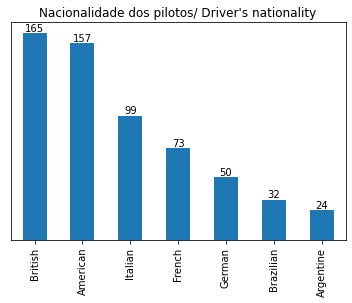

In [3]:
ax = drivers.nationality.value_counts().head(7).plot.bar()
ax.bar_label(ax.containers[0])
plt.yticks([], [])
plt.title("Nacionalidade dos pilotos/ Driver's nationality")
plt.show()

O Brasil já desfilou na F1 com **32** pilotos diferentes, um número expressivo, sendo o 6º país com mais pilotos na categoria. Você imaginou um número tão alto quanto esse? E quem são eles? <br> *Brazil already had in F1 with **32** different pilots, being the 6th country with more pilots in the category. Did you imagine a number as high as that? And who are they?*

Abaixo estão listados os pilotos brasileiros da F1, com o link do en.wikipedia.org que conta detalhes de cada um.  Nome que usou quando pilotou e também seu nome e sobrenome. <br>
*Below are listed the Brazilian F1 drivers, with the en.wikipedia.org link that tells details of each one. Name used when piloting and also your first and last name.*

In [3]:
drivers_br = drivers.query('nationality=="Brazilian"')[['driverId','surname','url']]
name_driv_br = []
name_driv_br = [i.replace('http://en.wikipedia.org/wiki/', '').replace('_', ' ') for i in list(drivers_br.url)]
# drivers_br = drivers_br.rename(columns={'url': 'real_name'})
drivers_br['real_name'] = name_driv_br
drivers_br.iloc[4,3] = 'Antonio Pizzonia'
drivers_br.iloc[14,3] = 'Mauricio Gugelmin'
drivers_br.iloc[24,3] = "Fritz d'Orey"
drivers_br = drivers_br.reset_index(drop=True)
drivers_br

,driverId,surname,url,real_name
0,12,Piquet Jr.,"http://en.wikipedia.org/wiki/Nelson_Piquet,_Jr.","Nelson Piquet, Jr."
1,13,Massa,http://en.wikipedia.org/wiki/Felipe_Massa,Felipe Massa
2,22,Barrichello,http://en.wikipedia.org/wiki/Rubens_Barrichello,Rubens Barrichello
3,41,Zonta,http://en.wikipedia.org/wiki/Ricardo_Zonta,Ricardo Zonta
4,42,Pizzonia,http://en.wikipedia.org/wiki/Ant%C3%B4nio_Pizz...,Antonio Pizzonia
5,43,da Matta,http://en.wikipedia.org/wiki/Cristiano_da_Matta,Cristiano da Matta
6,54,Burti,http://en.wikipedia.org/wiki/Luciano_Burti,Luciano Burti
7,58,Marques,http://en.wikipedia.org/wiki/Tarso_Marques,Tarso Marques
8,59,Bernoldi,http://en.wikipedia.org/wiki/Enrique_Bernoldi,Enrique Bernoldi
9,64,Diniz,http://en.wikipedia.org/wiki/Pedro_Diniz,Pedro Diniz


Obtendo as fotos de cada piloto pelo wikipedia.
<br> 
**#Construir um quadro com a foto dos pilotos**

In [5]:
wikip_list = list(drivers_br.url)

In [24]:
number=list(drivers_br.driverId)
for i, j in zip(wikip_list, number):
    response = requests.get(i)
    soup = BeautifulSoup(response.content, 'html.parser')
    images = soup.find('a', attrs = {'class': 'image'})
    for image in images:
        image_src = image['src']
        urllib.request.urlretrieve(image_src.replace('//', 'https://'), "Pictures/"+str(j)+'.jpeg')
#         number+=1

Será que houve alguma equipe brasileira? Vamos ver... <br>
*Was there a Brazilian team? We will see...*

In [5]:
constructors.query('nationality=="Brazilian"')

,constructorId,constructorRef,name,nationality,url
54,56,fittipaldi,Fittipaldi,Brazilian,http://en.wikipedia.org/wiki/Fittipaldi_%28con...


Em reportagem para o globo.com Emerson Fittipaldi fala sobre a equipe que fundou junto com o irmão Wilsinho, a Copersucar-Fittipaldi:
<br> 
- "Foi um projeto espetacular, que para nós, na época, me motivou muito, ter uma equipe brasileira de Fórmula 1. Pena que no final a gente não tinha mais patrocínio para continuar."
<br>

*In a report for globo.com Emerson Fittipaldi talks about the team he founded with his brother Wilsinho, the Copersucar-Fittipaldi:* <br>
- "*It was a spectacular project, which for us, at the time, motivated me a lot, having a Brazilian Formula 1 team. Too bad that in the end we didn't have more sponsorship to continue.*"

A equipe foi fundada em 1975 e sua estreia ocorreu no GP da Argentina, com Wilson Fittipaldi Jr. Ela contou com diversos pilotos brasileiros:
<br> *The team was founded in 1975 and its debut took place at the Argentine GP, with Wilson Fittipaldi Jr. It had several Brazilian pilots*
   - Wilson Fittipaldi Jr (1975)
   - Emerson FIttipaldi (1976-1980)
   - Ingo Hoffmann (1976-1977)
   - Alex Dias Ribeiro (1979)
   - Chico Serra (1981-1982)
   <br>
   
E também com nomes internacionais: / *And also with international names:*
   - Arturo Merzario (1975, Italiano)
   - Keke Rosberg (1980, Finlandês, e que veio a ser campeão da F1 em 1982 pela Williams / *who became F1 champion in 1982 with Williams Team*)

No entanto a equipe não teve um desempenho muito bom, marcando somente 44 pontos em 8 temporadas e esteve presente em 119 corridas. E seus melhores resultados foram com Emerson Fittipaldi, que conseguiu um terceiro lugar no Grande Prêmio do Oeste dos Estados Unidos de 1980, onde largou na  24ª posicão (último), e um segundo lugar no Grande Prêmio do Brasil de 1978, nessa ocasião largou na 7ª posição.<br><br>
*The team did not perform very well, scoring only 44 points in 8 seasons and was present in 119 races. And his best results were with Emerson Fittipaldi, who managed a third place in the Grand Prix of the West of the United States of 1980, where he started in the 24th position (last), and a second place in the Grand Prix of Brazil of 1978, on that occasion he started in the 7th position*

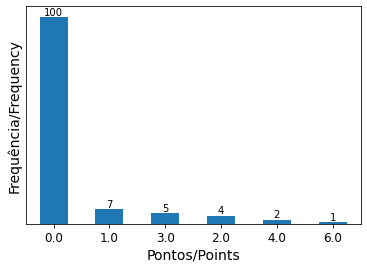

In [6]:
ax= constructor_results.query('constructorId==56').points.value_counts().plot.bar()
ax.bar_label(ax.containers[0])
ax.set_ylabel("Frequência/Frequency",fontsize=14)
ax.set_xlabel("Pontos/Points",fontsize=14)
plt.xticks(rotation=0, size=12)
plt.yticks([], [])
plt.show()

E quem foi o primeiro brasileiro a pilotar na F1?<br>
*And who was the first Brazilian to drive in F1?*

A primeira vista foi utilizado o dataset **lap_times**, mas foi observado que não continha todas as Id's dos pilotos e isso fez com que informações sobre vários pilotos não fosse obtidas. Então optou-se por fazer a verificação pelo dataset **results**, que contém informação sobre todos os pilotos. <br>
<br>
*At first glance, the **lap_times** dataset was used, but it was observed that it did not contain all the drivers' ID's and this meant that information about several drivers was not obtained. So it was decided to carry out the verification using the **results** dataset, which contains information about all the drivers.*

In [4]:
driv_laps_br = pd.merge(results, drivers_br, how = 'inner', on = 'driverId')
driv_laps_br.drop(["url", 'positionText', 'grid', ], axis=1, inplace=True)

In [5]:
driv_laps_br.head(2)

,resultId,raceId,driverId,constructorId,number,position,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,surname,real_name
0,12,18,12,4,6,\N,12,0.0,30,\N,\N,20,16,1:31.384,208.907,8,Piquet Jr.,"Nelson Piquet, Jr."
1,33,19,12,4,6,11,11,0.0,56,+1:32.202,5570757,52,15,1:36.956,205.812,1,Piquet Jr.,"Nelson Piquet, Jr."


In [6]:
small_races = races.loc[:, ['raceId', 'circuitId', 'year']]

In [7]:
driv_laps_br = driv_laps_br.merge(small_races, left_on = 'raceId', right_on = 'raceId')

In [8]:
driv_laps_br.head(2)

,resultId,raceId,driverId,constructorId,number,position,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,surname,real_name,circuitId,year
0,12,18,12,4,6,\N,12,0.0,30,\N,\N,20,16,1:31.384,208.907,8,Piquet Jr.,"Nelson Piquet, Jr.",1,2008
1,13,18,13,6,2,\N,13,0.0,29,\N,\N,23,6,1:28.175,216.510,5,Massa,Felipe Massa,1,2008


In [9]:
driv_laps_br.groupby(['year', 'real_name'])['points'].sum()

year  real_name              
1951  Chico Landi                 0.0
1952  Chico Landi                 0.0
      Gino Bianco                 0.0
1953  Chico Landi                 0.0
1955  Hernando da Silva Ramos     0.0
                                 ... 
2015  Felipe Nasr                27.0
2016  Felipe Massa               53.0
      Felipe Nasr                 2.0
2017  Felipe Massa               43.0
2020  Pietro Fittipaldi           0.0
Name: points, Length: 148, dtype: float64

In [10]:
display(driv_laps_br.query('driverId==622')[['resultId', 'raceId', 'driverId', 'constructorId', 'position', 'points', 'laps',
                                   'statusId', 'circuitId', 'year']])

display(constructors.query(('constructorId==105 | constructorId==6')))


,resultId,raceId,driverId,constructorId,position,points,laps,statusId,circuitId,year
1933,18886,784,622,105,4,1.5,92,16,25,1956
1934,19599,815,622,105,\N,0.0,54,6,66,1953
1935,19635,816,622,105,\N,0.0,18,5,14,1953
1936,19806,823,622,105,9,0.0,83,17,39,1952
1938,19823,824,622,105,8,0.0,76,14,14,1952
1940,20002,831,622,6,\N,0.0,0,7,14,1951


,constructorId,constructorRef,name,nationality,url
5,6,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari
103,105,maserati,Maserati,Italian,http://en.wikipedia.org/wiki/Maserati


O primeiro brasileiro a figurar na F1 foi **Chico Landi** em **1951**, e marcou um total de 1,5 pontos. Seguno o site globo.com, ele é Natural de São Paulo, Chico começou a trabalhar aos 11 anos como mecânico e passou a se destacar como pilotos nas nacionais na década de 1930, como no Circuito da Gávea, onde venceu em 1941, 1947 e 1948. Landi iniciou a carreira internacional em 1947, correndo o prestigiado Grande Prêmio de Bari com uma Maserati. No ano seguinte, Chico venceu a corrida, desta vez com uma Ferrari. Foi a primeira vitória de um brasileiro num grande prêmio no exterior. Depois de correr as provas de Bari e Monza em 1949, com dois quartos lugares, Chico não participou de nenhuma corrida na temporada inaugural do Campeonato Mundial de Fórmula 1, no ano seguinte. Apenas em 1951, Landi resolveu se aventurar na categoria. Correndo pelas equipes **Ferrari** e **Maserati**. <br>
<br>
*The first Brazilian to feature in F1 was **Chico Landi** in **1951**, and scored a total of 1.5 points. According to the website globo.com, he was born in São Paulo, Chico started working at age 11 as a mechanic and went on to stand out as a driver in national championships in the 1930s, such as Circuito da Gávea, where he won in 1941, 1947 and 1948. Landi began his international career in 1947, racing the prestigious Bari Grand Prix in a Maserati. The following year, Chico won the race, this time in a Ferrari. It was the first victory of a Brazilian in a grand prix abroad. After running the Bari and Monza races in 1949, with two fourth places, Chico did not participate in any races in the inaugural season of the Formula 1 World Championship, the following year. Only in 1951, Landi decided to venture into the category. Racing for the **Ferrari** and **Maserati** teams.*

In [14]:
display(driv_laps_br.query("position=='1'").sort_values('year').head(1))
display(races.query('raceId==654'))

,resultId,raceId,driverId,constructorId,number,position,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,surname,real_name,circuitId,year
1927,16158,654,224,32,24,1,1,9.0,108,1:57:32.79,7052790,\N,\N,\N,\N,1,Fittipaldi,Emerson Fittipaldi,46,1970


,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
653,654,1970,12,46,United States Grand Prix,1970-10-04,\N,http://en.wikipedia.org/wiki/1970_United_State...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


No entanto a primeira vitória brasileira só veio a acontecer no ano de **1970**, com o nosso bom e conhecido Emerson Fittipaldi. Corrida no qual largou na terceira posição e conseguiu a vitória.

E. Fittipaldi lembra daquele fim de semana com muita emoção em entrevista ao site globo.com: "A última volta em Watkins Glen foi uma das mais longas da minha história, parecia que não terminava nunca. Eu escutando tudo, você fica alerta para tudo, se o câmbio não tem barulho, se o motor está certo, se tem gasolina para chegar ao fim. Toda essa preocupação, esse sentimento... Eu lembro que, entrando na última curva, entrando na reta de chegada, aquela imagem que eu tinha do Jochen Rindt vencendo um grande prêmio pela Lotus, do grande Graham Hill, do grande Jim Clark, sempre com o Colin Chapman jogando o boné dele, isso era para mim. Aí eu falava 'não estou acreditando!'. O Chapman pulou na pista, e o starter da corrida era um americano muito famoso, ele pulava muito, aquilo para mim foi um sonho. Ganhei o Grande Prêmio dos Estados Unidos depois de sair de um fim de semana de tragédia". Ele o considera uma tragédia pois ele teve um acidente na sexta-feira, o piloto Jochen Rindt morrera no sábado, entre outras más situações que ocorrerão naquele fimd e semana.<br>
<br>
*However, the first Brazilian victory only happened in the year of **1970**, with our good and well-known Emerson Fittipaldi. Race in which he started in third position and won.*

*E. Fittipaldi recalls that weekend with a lot of emotion in an interview with the website globo.com: "The last lap at Watkins Glen was one of the longest in my history, it seemed like it would never end. Me listening to everything, you're alert for everything , if the gearbox doesn't make any noise, if the engine is right, if there's gas to reach the end. All that concern, that feeling... I remember that, entering the last curve, entering the finish line, that image that I There was Jochen Rindt winning a grand prix for Lotus, the great Graham Hill, the great Jim Clark, always with Colin Chapman throwing his cap, that was for me. Then I said 'I can't believe it!'. track, and the starter of the race was a very famous American, he jumped a lot, that for me was a dream. I won the United States Grand Prix after coming off a weekend of tragedy". He considers it a tragedy because he had an accident on Friday, the driver Jochen Rindt died on Saturday, among other bad situations that will occur that weekend.*

In [11]:
resul_befor_first_win = driv_laps_br.query("year<1970").sort_values('year')
resul_befor_first_win.head(2)

,resultId,raceId,driverId,constructorId,number,position,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,surname,real_name,circuitId,year
1940,20002,831,622,6,12,\N,20,0.0,0,\N,\N,\N,\N,\N,\N,7,Landi,Chico Landi,14,1951
1949,19753,821,746,105,34,18,18,0.0,77,\N,\N,\N,\N,\N,\N,18,Bianco,Gino Bianco,9,1952


Entre a estreia até sua primeira vitória foram 21 corridas e tendo como melhor resultado uma 4ª posição em 1956 com Landi. A decada de 60 foi uma época sem brasileiros na categória. Só retornando em 1970 com Emerson Fittipaldi.

------------
*Between his debut and his first victory there were 21 races and the best result was a 4th position in 1956 with Landi. The 60's was a time without Brazilians in the category. Only returning in 1970 with Emerson Fittipaldi.*

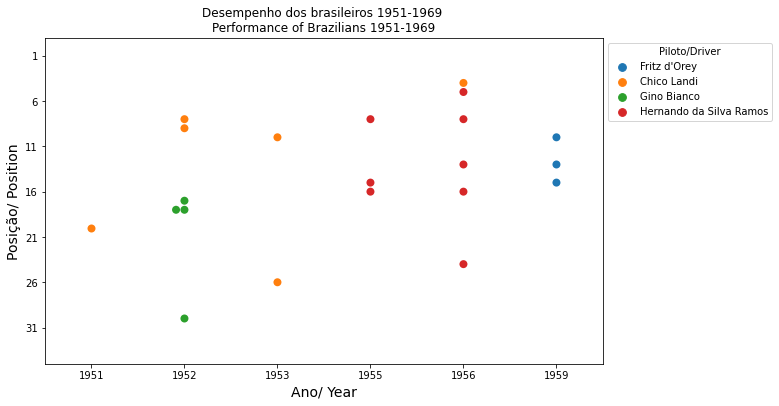

In [74]:
g = sns.swarmplot(x='year', 
                y='positionOrder', data=driv_laps_br.query('year<1970'), 
                hue='real_name',
                palette='tab10', s=8
                   )
plt.ylim(35, -1)
plt.yticks(np.arange(1, 35, step=5))
plt.title("Desempenho dos brasileiros 1951-1969 \nPerformance of Brazilians 1951-1969")
plt.ylabel("Posição/ Position",fontsize=14)
plt.xlabel("Ano/ Year",fontsize=14)
plt.rcParams["figure.figsize"] = (10,6)
g.legend (title='Piloto/Driver',
          bbox_to_anchor = (1, 1))


plt.show(g)

Os tempos de volta de cada corrida não pode ser acompanhado porque os dados não estão disponíveis, para esse período de tempo.<br>
*Lap times for each race cannot be tracked because data is not available for that time period.*

**Agora será exibido o desempenho dos brasileiros nos últimos 50 anos, dívididos por década.**<br>

**_Now the performance of Brazilians over the last 50 years will be displayed, divided by decade._**

In [92]:
palette = {"Nelson Piquet":"blue", "Emerson Fittipaldi":"black", "Alex Ribeiro":"gray", "Carlos Pace":"crimson", "Ingo Hoffmann":"lime", "Luiz Bueno":"darkorange", "Wilson Fittipaldi":"plum",
          "Roberto Moreno":"olive", "Ayrton Senna":"red", "Mauricio Gugelmin":"green", "Chico Serra":"darkviolet", "Raul Boesel":"tan",
          "Rubens Barrichello":"orange", "Ricardo Zonta":"silver", "Pedro Diniz":"darkslategrey", "Ricardo Rosset":"cornflowerblue", "Tarso Marques":"firebrick", "Christian Fittipaldi":"hotpink",
           "Nelson Piquet, Jr.":"royalblue", "Felipe Massa":"darkgreen", "Antonio Pizzonia":"blueviolet", "Cristiano da Matta":"palegreen", "Enrique Bernoldi":"orangered", "Luciano Burti":"deeppink", 
           "Bruno Senna":"chocolate", "Lucas di Grassi":"orchid", "Felipe Nasr":"slategray", "Pietro Fittipaldi":"chartreuse"}

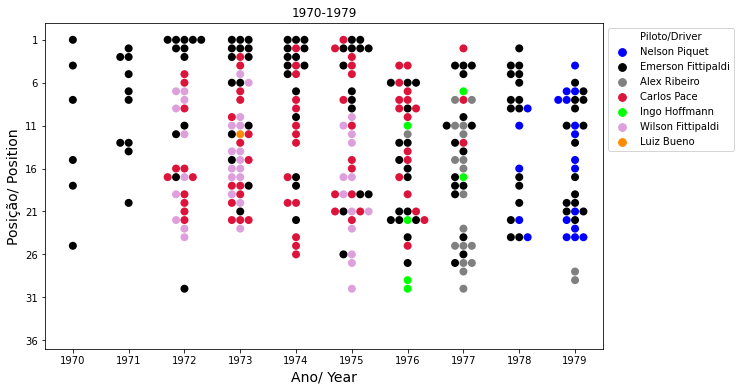

In [73]:
g = sns.swarmplot(x='year', 
                y='positionOrder', data=driv_laps_br.query('year>=1970 & year<1980'), 
                hue='real_name',
                palette=palette, s=8
                   )
plt.ylim(37, -1)
plt.yticks(np.arange(1, 37, step=5))
plt.title("1970-1979")
plt.ylabel("Posição/ Position",fontsize=14)
plt.xlabel("Ano/ Year",fontsize=14)
plt.rcParams["figure.figsize"] = (10,6)
g.legend (title='Piloto/Driver',
          bbox_to_anchor = (1, 1))


plt.show(g)

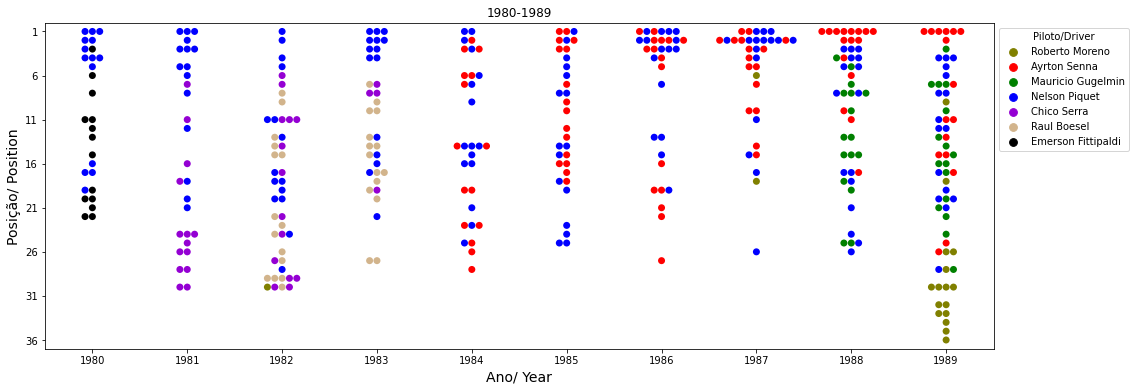

In [88]:
g = sns.swarmplot(x='year', 
                y='positionOrder', data=driv_laps_br.query('year>=1980 & year<1990'), 
                hue='real_name',
                palette=palette, s=7
                   )
plt.ylim(37, 0)
plt.yticks(np.arange(1, 37, step=5))
plt.title("1980-1989")
plt.ylabel("Posição/ Position",fontsize=14)
plt.xlabel("Ano/ Year",fontsize=14)
plt.rcParams["figure.figsize"] = (17,6)
g.legend (title='Piloto/Driver',
          bbox_to_anchor = (1, 1))


plt.show(g)

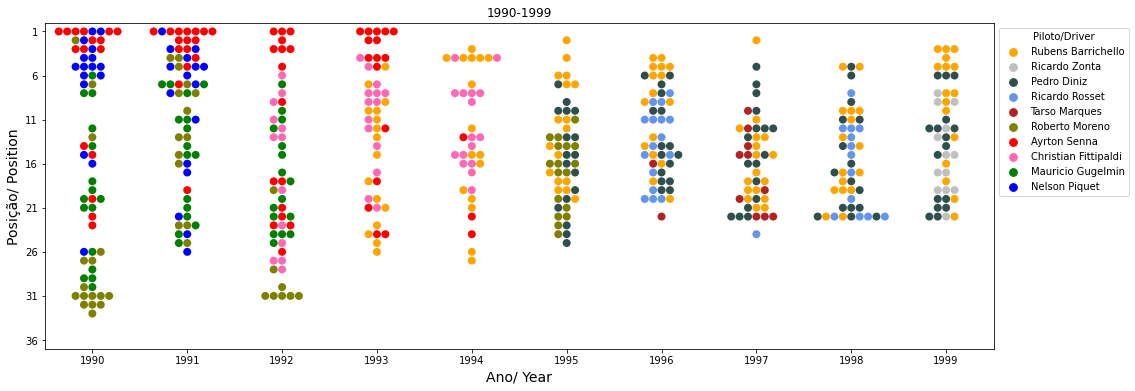

In [89]:
g = sns.swarmplot(x='year', 
                y='positionOrder', data=driv_laps_br.query('year>=1990 & year<2000'), 
                hue='real_name',
                palette=palette, s=8
                   )
plt.ylim(37, 0)
plt.yticks(np.arange(1, 37, step=5))
plt.title("1990-1999")
plt.ylabel("Posição/ Position",fontsize=14)
plt.xlabel("Ano/ Year",fontsize=14)
plt.rcParams["figure.figsize"] = (15,10)
g.legend (title='Piloto/Driver',
          bbox_to_anchor = (1, 1))


plt.show(g)

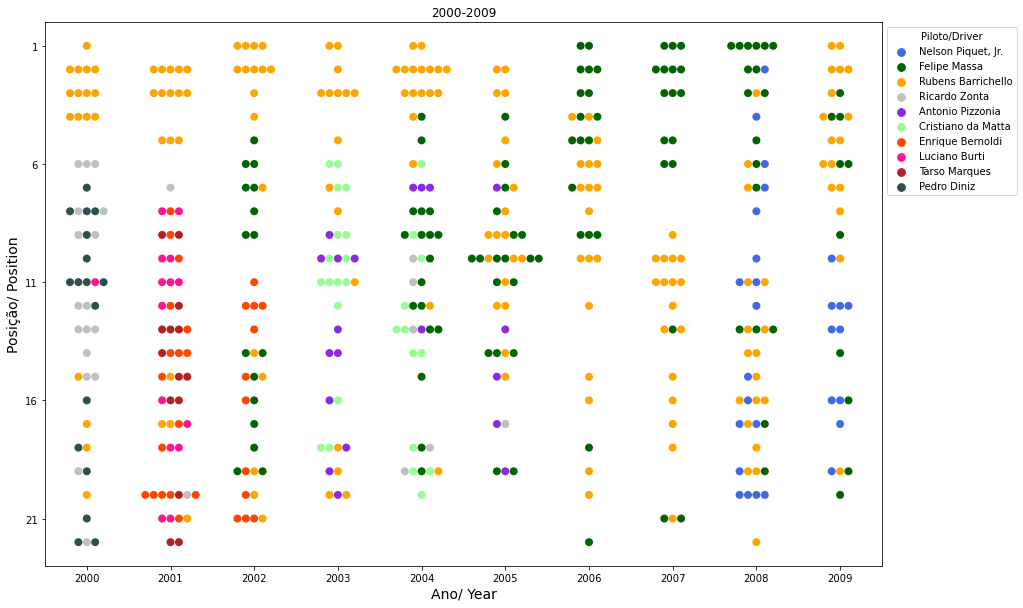

In [93]:
g = sns.swarmplot(x='year', 
                y='positionOrder', data=driv_laps_br.query('year>=2000 & year<2010'), 
                hue='real_name',
                palette=palette, s=8
                   )
plt.ylim(23, 0)
plt.yticks(np.arange(1, 23, step=5))
plt.title("2000-2009")
plt.ylabel("Posição/ Position",fontsize=14)
plt.xlabel("Ano/ Year",fontsize=14)
plt.rcParams["figure.figsize"] = (15,10)
g.legend (title='Piloto/Driver',
          bbox_to_anchor = (1, 1))


plt.show(g)

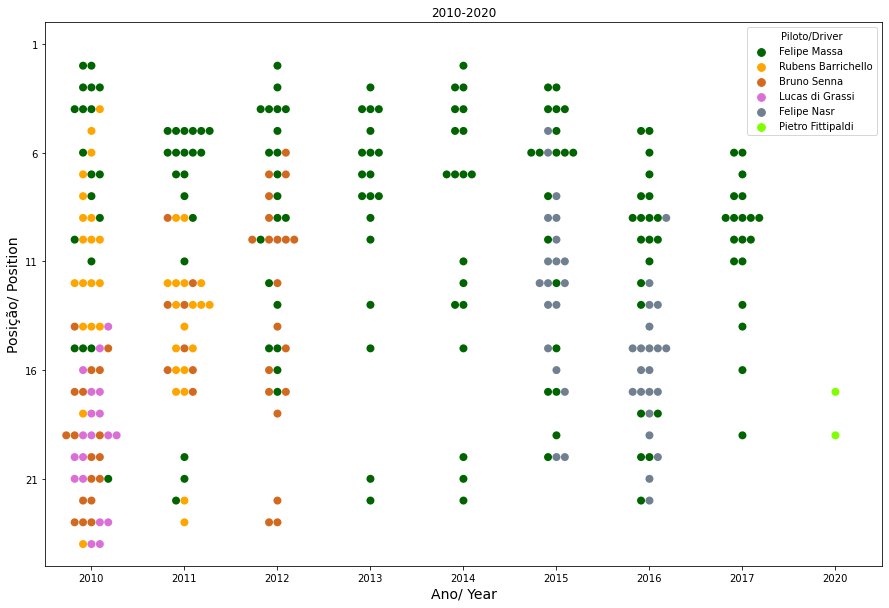

In [91]:
g = sns.swarmplot(x='year', 
                y='positionOrder', data=driv_laps_br.query('year>=2010'), 
                hue='real_name',
                palette=palette, s=8
                   )
plt.ylim(25, 0)
plt.yticks(np.arange(1, 25, step=5))
plt.title("2010-2020")
plt.ylabel("Posição/ Position",fontsize=14)
plt.xlabel("Ano/ Year",fontsize=14)
plt.rcParams["figure.figsize"] = (15,10)
g.legend (title='Piloto/Driver',
          bbox_to_anchor = (1, 1))


plt.show(g)